# Hotel Booking Dataset Analysis Using Pandas & Seaborn


### About DataSet :


#### This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel 
#### Booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.
#### Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted.
#### Four Columns, 'name', 'email', 'phone number' and 'credit_card' have been artificially created and added to the dataset.
#### 
#### The data is originally from the article :
> Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and 
 Luis Nunes for Data in Brief, Volume 22, February 2019.

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading dataset from CSV file

In [2]:
df=pd.read_csv('../input/hotel-booking/hotel_booking.csv')

#### Dataset information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Gives number of rows and columns

In [4]:
pd.DataFrame([df.shape],columns=['number_of_rows','number_of_columns'],index=['#'])

,number_of_rows,number_of_columns
#,119390,36


#### Check out the missing data


In [5]:

pd.DataFrame([(df.isnull().values.any(),df.isnull().sum().idxmax(),max(df.isnull().sum()))],columns=['missing_data_existance','column_with_maximum_missing_data','number_of_missing_data'],index=['#'])

,missing_data_existance,column_with_maximum_missing_data,number_of_missing_data
#,True,company,112593


#### Drop " company " column from DataFrame 

In [6]:
df.drop('company',axis=1).columns.tolist()


['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

#### Which countries have the most passengers ?

In [7]:
df['total_passengers'] = df['adults'] + df['children'] + df['babies'] - df['is_canceled']
df[['country','adults','children','babies','is_canceled','total_passengers']].groupby('country').sum().nlargest(5,'total_passengers').reset_index()


,country,adults,children,babies,is_canceled,total_passengers
0,PRT,86131,3468.0,437,27519,62512.0
1,GBR,23223,1253.0,92,2453,22115.0
2,FRA,20291,1211.0,77,1934,19645.0
3,ESP,16615,1412.0,126,2177,15976.0
4,DEU,13703,477.0,18,1218,12980.0


#### Find passenger who have the maximum ADR (Average Daily Rate)

In [8]:
pd.DataFrame([(df.name[df['adr'].idxmax()],df['adr'].max())],columns=['passenger_name','price'] ,index=['max(ADR)'])

,passenger_name,price
max(ADR),Daniel Walter,5400.0


####  Average of total ADRs

In [9]:
pd.DataFrame([(round(df['adr'].mean(),2))],columns=['average_of_total_adrs',] ,index=['mean (ADR)'])

,average_of_total_adrs
mean (ADR),101.83


#### Define the average of number of nights stayed.

In [10]:
df['total_stays_in_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [11]:
df['total_stays_in_nights'].mean().round(2)

3.43

#### Define the name and email of people who had 5 special requests

In [12]:
df[df['total_of_special_requests'] == 5][['name','email']].reset_index()

,index,name,email
0,7860,Amanda Harper,Amanda.H66@yahoo.com
1,11125,Laura Sanders,Sanders_Laura@hotmail.com
2,14596,Tommy Ortiz,Tommy_O@hotmail.com
3,14921,Gilbert Miller,Miller.Gilbert@aol.com
4,14922,Timothy Torres,TTorres@protonmail.com
5,24630,Jennifer Weaver,Jennifer_W@aol.com
6,27288,Crystal Horton,Crystal.H@mail.com
7,27477,Brittney Burke,Burke_Brittney16@att.com
8,29906,Cynthia Cabrera,Cabrera.Cynthia@xfinity.com
9,29949,Sarah Floyd,Sarah_F@gmail.com


#### Which first names have the most frequency of last name?


In [13]:
df['name'].apply(lambda last_name:last_name.split()[1]).value_counts().head().to_frame('value_counts').reset_index().rename(columns={'index':'last_name'})


,last_name,value_counts
0,Smith,2510
1,Johnson,1998
2,Williams,1628
3,Jones,1441
4,Brown,1433


#### Define the people whom reserved a hotel with most number of babies and children

In [14]:
df['total_babies_and_children'] = df['babies'] + df['children']
df[['name','email','phone-number','credit_card','hotel','total_babies_and_children']].sort_values('total_babies_and_children',ascending=False).head()

,name,email,phone-number,credit_card,hotel,total_babies_and_children
328,Jamie Ramirez,Ramirez_Jamie22@aol.com,268-823-5667,************7600,Resort Hotel,10.0
46619,Nicholas Parker,Parker.Nicholas57@hotmail.com,440-692-0519,************4291,City Hotel,10.0
78656,Marc Robinson,Robinson_Marc@protonmail.com,934-726-2629,************1933,City Hotel,9.0
19718,Mr. Jeffrey Cross,Mr..Cross@yandex.com,822-960-5931,************6777,Resort Hotel,3.0
107837,Albert French,French.Albert@mail.com,953-281-5231,************9947,City Hotel,3.0


#### Define the phone number of regions which had the most reservations

In [15]:
df['phone-number'].apply(lambda phone_code:phone_code[:3]).value_counts().head().to_frame('value_counts').reset_index().rename(columns={'index':'phone_code'})

,phone_code,value_counts
0,799,168
1,185,167
2,541,166
3,137,163
4,739,163


### Exploratory Data Analysis

<AxesSubplot:xlabel='hotel', ylabel='count'>

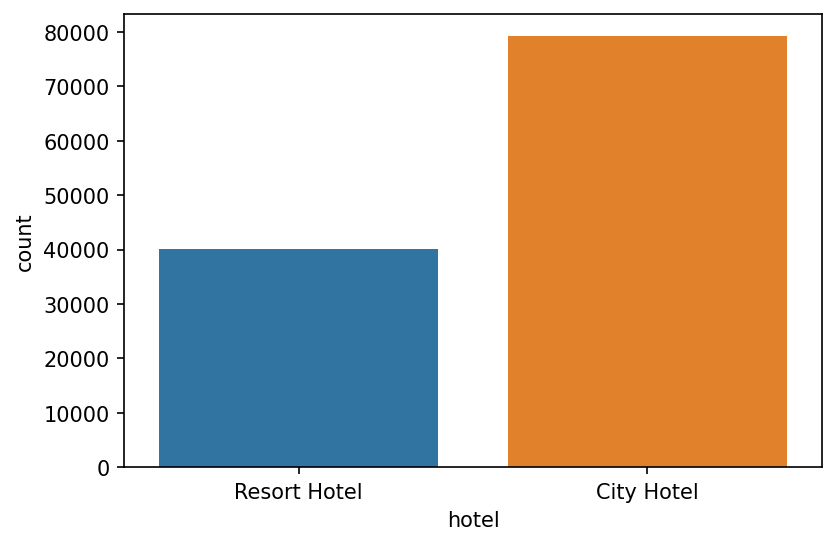

In [16]:
plt.figure(figsize=(6,4), dpi=150)
sns.countplot(x='hotel', data=df)

#### Chart analysis :
##### City Hotel has the most visitors.


<AxesSubplot:xlabel='customer_type', ylabel='total_stays_in_nights'>

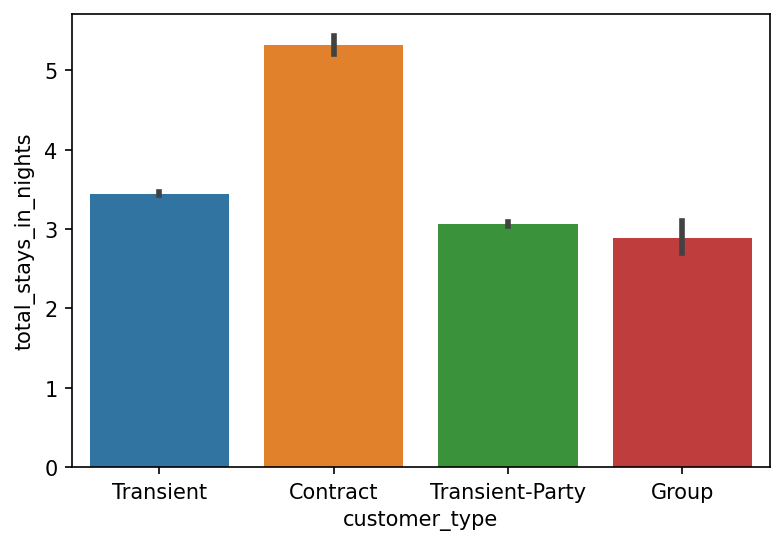

In [17]:
plt.figure(figsize=(6,4), dpi=150)
sns.barplot(x='customer_type', y='total_stays_in_nights', data=df)

#### Chart analysis :
##### ' Contract ' of Customer Types has the most stay duration.


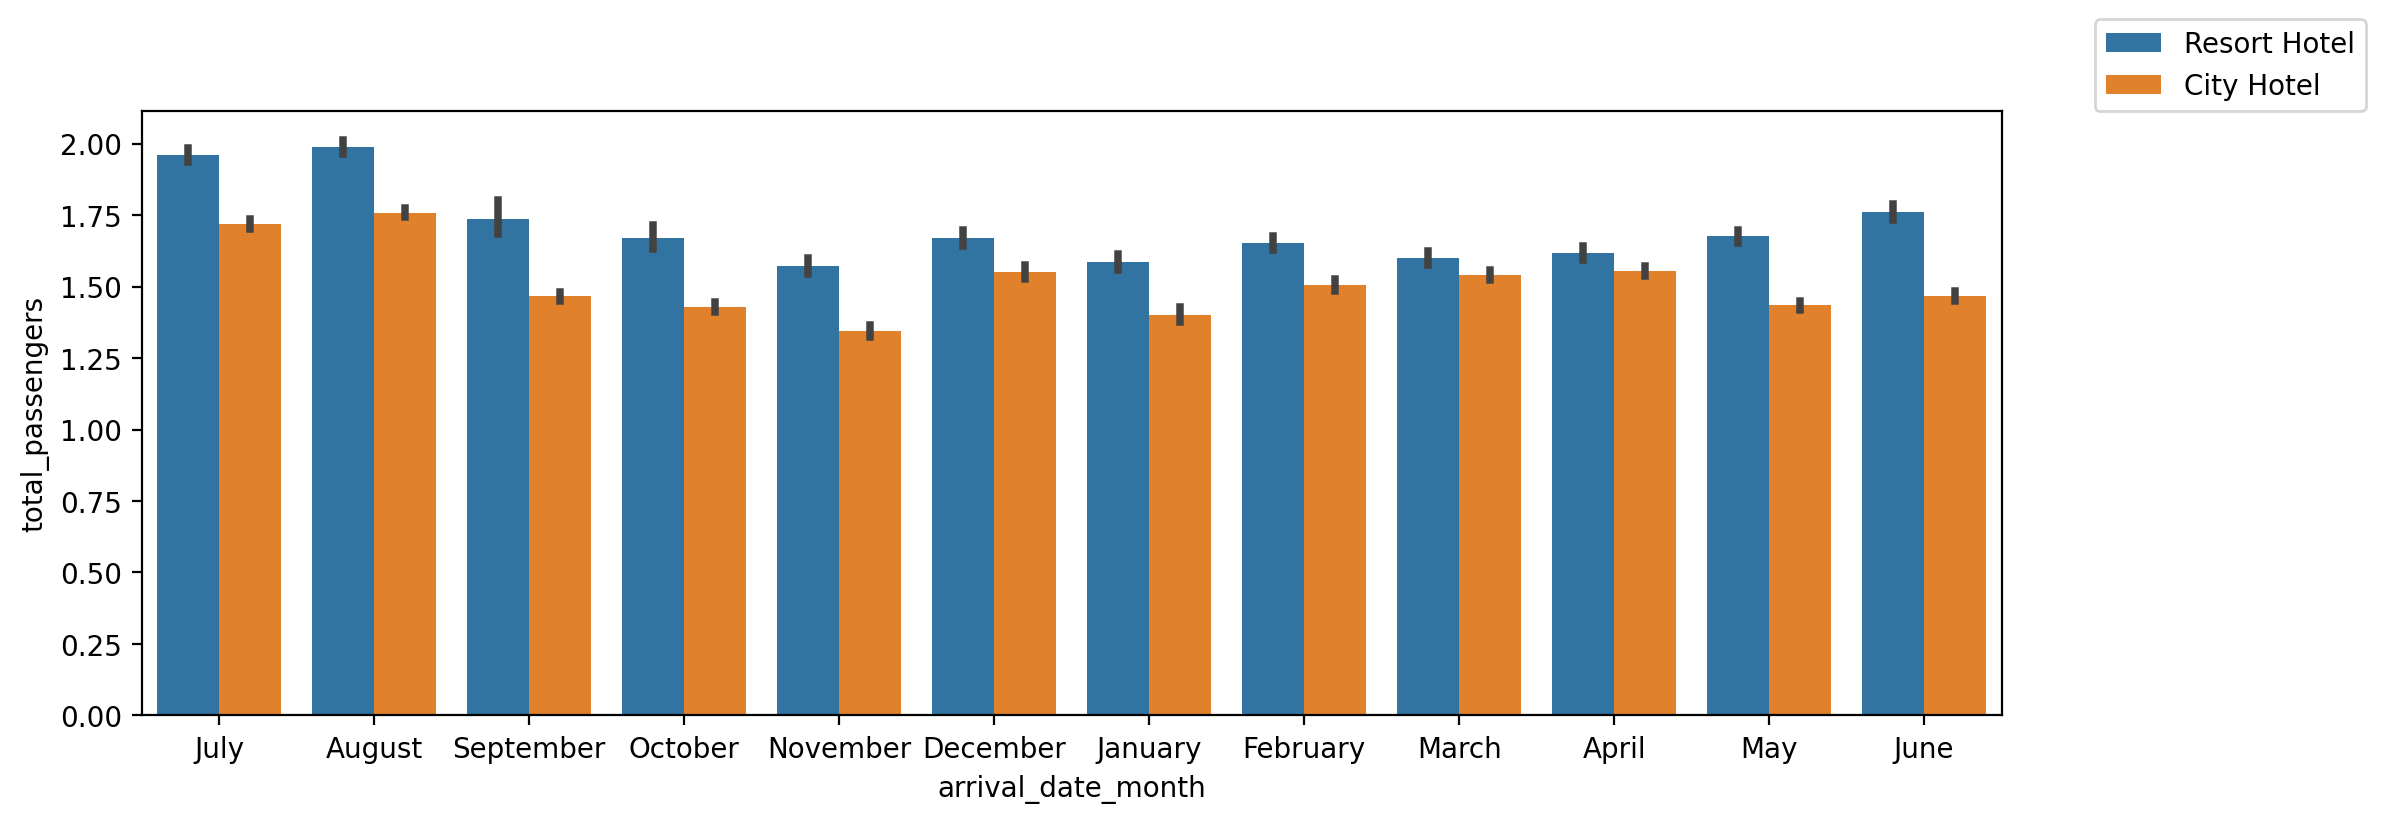

In [18]:
plt.figure(figsize=(12,4), dpi=200)
sns.barplot(x='arrival_date_month', y='total_passengers',hue='hotel' ,data=df)
plt.legend(loc=(1.05, 1))

#### Chart analysis :
#####  In both hotels most bookings were made from July to August . 
##### In all months, the most passengers are for Resort Hotel